<a href="https://colab.research.google.com/github/kshuhambgs123/Age_Detection_Model/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 %matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# utils
from matplotlib.pyplot import imread
from skimage.transform import resize
import os
import random

# Configure visualisations
# %matplotlib inline
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 10,8 


In [15]:
def bar_plot(df, col, text = True, k = None, rot = 0):
    """
    Arguments:
    x : pandas series
    Returns:
    seaborn barplot with text on top
    """
    if k == None:
        x = df[col].value_counts()
    else:
        x = df[col].value_counts()[:k]
    ax= sns.barplot(x = x.index, y = x.values, alpha=0.8)
    plt.title("# per class")
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    #adding the text labels
    if text:
        rects = ax.patches
        labels = x.values
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation = rot)
    plt.show()

In [3]:
# set the root path
root_dir = os.path.abspath('.')
# set the data dir
data_dir = '/content/drive/MyDrive/Age-Detection-mod/input'

In [4]:
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [11]:
# train.head()
#train.sort_values(["ID"], 
  #                  axis=0,
 #                   ascending=[True], 
  #                  inplace=True)
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
print("Train shape :",train.shape)
print("Test shape :",test.shape)

Train shape : (19906, 2)
Test shape : (6636, 1)


In [6]:
def show_random_image(df, folder_name):
    i = random.choice(df.index)

    img_name = df.ID[i]
    img = imread(os.path.join(data_dir, folder_name, img_name))

    print('Age : ', train.Class[i])
    plt.imshow(img)
    

Age :  YOUNG


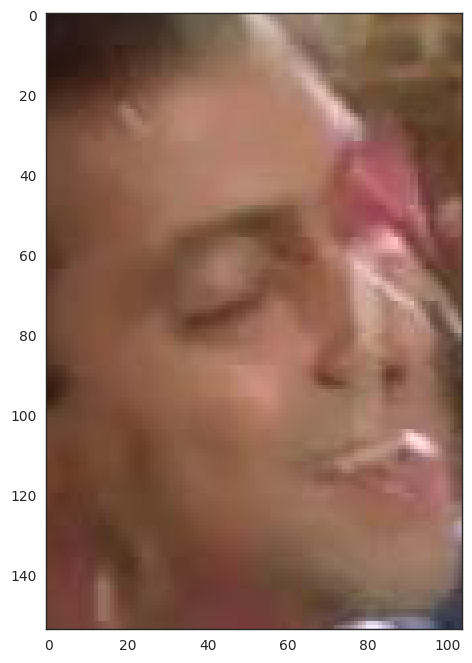

In [9]:
# show random image 
show_random_image(train, "train")

In [10]:
def resize_img(df, folder_name):
    temp = []
    for index,img_name in enumerate(df.ID):
        if index % 1000 == 0:
            print ('Index :',index)
        img_path = os.path.join(data_dir, folder_name, img_name)
        img = imread(img_path)
        img = resize(img, (32, 32))
        img = img.astype('float32')
        temp.append(img)

    return np.stack(temp)
    

In [11]:
# resize all the images 32 x 32 (training set), usually takes ~ 4-5 min (CPU)
train_x = resize_img(train, "train")

Index : 0
Index : 1000
Index : 2000
Index : 3000
Index : 4000
Index : 5000
Index : 6000
Index : 7000
Index : 8000
Index : 9000
Index : 10000
Index : 11000
Index : 12000
Index : 13000
Index : 14000
Index : 15000
Index : 16000
Index : 17000
Index : 18000
Index : 19000


In [12]:
# resize all the images 32 x 32 (testing set)
test_x = resize_img(test, "test")

Index : 0
Index : 1000
Index : 2000
Index : 3000
Index : 4000
Index : 5000
Index : 6000


In [13]:
# flatten the image array
train_x = train_x / 255
test_x = test_x / 255

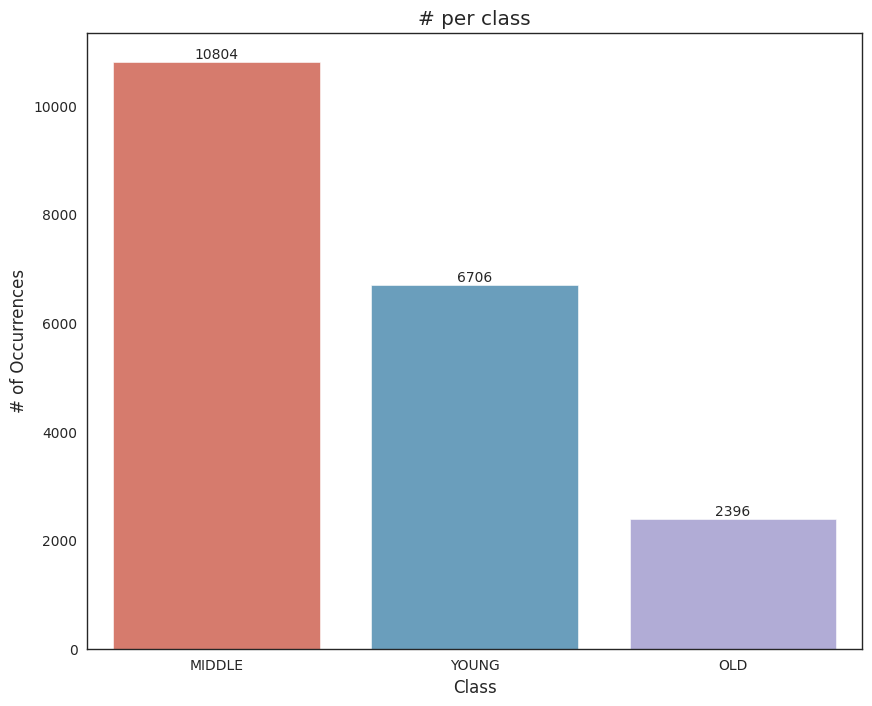

In [16]:
bar_plot(train, "Class")

In [17]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [18]:
# set up the parameters for neural network
input_num_units = (32, 32, 3)
hidden_num_units = 600
output_num_units = 3
num_filter = 100

epochs = 30
batch_size = 64

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [20]:
model = Sequential()

## Input Layer
model.add(InputLayer(input_shape=input_num_units))

## Convolutional layer
model.add(Conv2D(num_filter, (3, 3), activation='relu', input_shape=input_num_units))

model.add(MaxPooling2D())

model.add(Dropout(0.25))

model.add(Conv2D(int(num_filter * 0.5), (3, 3), activation='relu', input_shape=(10, 10, 100)))

model.add(MaxPooling2D())

model.add(Dropout(0.25))

model.add(Conv2D(int(num_filter * 0.3), (3, 3), activation='relu', input_shape=(1, 1, 10)))

model.add(Flatten())

model.add(Dense(hidden_num_units, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(int(hidden_num_units * 0.2), activation='relu'))

model.add(Dense(units=output_num_units, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 100)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 100)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 50)        45050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 50)          0

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

In [23]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.1)

Epoch 1/30
280/280 [==============================] - 14s 10ms/step - loss: 0.9599 - accuracy: 0.5422 - val_loss: 0.9483 - val_accuracy: 0.5379
Epoch 2/30
280/280 [==============================] - 3s 10ms/step - loss: 0.9557 - accuracy: 0.5433 - val_loss: 0.9518 - val_accuracy: 0.5379
Epoch 3/30
280/280 [==============================] - 3s 9ms/step - loss: 0.9551 - accuracy: 0.5433 - val_loss: 0.9491 - val_accuracy: 0.5379
Epoch 4/30
280/280 [==============================] - 2s 8ms/step - loss: 0.9551 - accuracy: 0.5433 - val_loss: 0.9504 - val_accuracy: 0.5379
Epoch 5/30
280/280 [==============================] - 2s 8ms/step - loss: 0.9553 - accuracy: 0.5433 - val_loss: 0.9482 - val_accuracy: 0.5379
Epoch 6/30
280/280 [==============================] - 2s 8ms/step - loss: 0.9545 - accuracy: 0.5433 - val_loss: 0.9495 - val_accuracy: 0.5379
Epoch 7/30
280/280 [==============================] - 2s 8ms/step - loss: 0.9549 - accuracy: 0.5433 - val_loss: 0.9495 - val_accuracy: 0.5379
Epo

In [27]:
pred_train = model.predict(train_x)
pred = model.predict(test_x)
pred = lb.inverse_transform(np.argmax(pred, axis = 1))

test['Class'] = pred
test.to_csv('submission.csv', index=False)

208/208 [==============================] - 0s 2ms/step


Original: MIDDLE Predicted: ['MIDDLE']


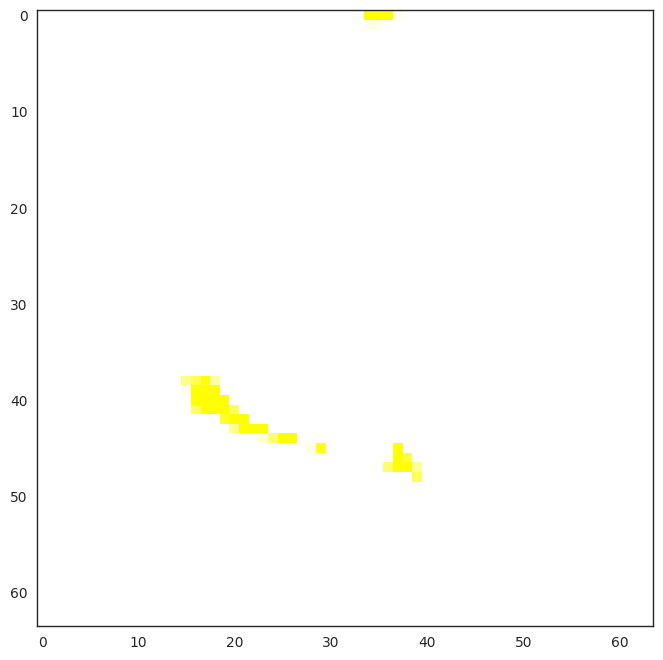

In [44]:
i = random.choice(train.index)
img_name = train.ID[i]

img = imread(os.path.join(data_dir, 'train', img_name)).astype('float32')
resized_img = resize(img, (64, 64))
resized_img = np.clip(resized_img, 0, 1)  # Clip values to [0, 1]
plt.imshow(resized_img)
pred_label = np.argmax(pred_train[i])
print("Original:", train.Class[i], 'Predicted:', lb.inverse_transform([pred_label]))
